<a href="https://colab.research.google.com/github/timluis/ds4geo_MainProject/blob/main/Notebooks/ProjectPlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detect artifical snow in ski areas with machine learning

This main project is about creating a machin learning algorithm which is able to detect areas with artifical snow, natural snow and no snow cover in ski areas in tyrol. This notebook shows a first overview of the satellite data with artifical snow and ski runs.

In [1]:
cd ..

c:\Users\timph\GitHub\ds4geo_MainProject


In [ ]:
# install geopanda, rtree and descartes
# this is a workaround which is only requierd in google colab 
# more information on this issue: https://github.com/geopandas/geopandas/issues/901

#!apt update
#!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
!pip install rasterio

In [ ]:
!git clone https://github.com/timluis/ds4geo_MainProject

Cloning into 'ds4geo_MainProject'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 169 (delta 65), reused 43 (delta 9), pack-reused 0
Receiving objects: 100% (169/169), 15.07 MiB | 13.27 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
cd ds4geo_MainProject/

/content/ds4geo_MainProject


In [ ]:
!pwd

/content/ds4geo_MainProject


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
import Processing as pc 

In [ ]:
# load ski resort area as shapefile, boundary of tyrol as shapefile and the ski runs as a shape file
ski_areas = gpd.read_file('https://services3.arcgis.com/hG7UfxX49PQ8XkXh/arcgis/rest/services/URP_Schigebietsgrenzen/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')
tyrol = gpd.read_file('https://nextcloud.bev.gv.at/nextcloud/index.php/s/Em37fLr8B4jbrxM/download')

In [ ]:
ski_runs = gpd.read_file('Data/ShapeFiles/ski_runs.geojson')
sat_im = rasterio.open('Data/Satellite_data/2020-11-29_Sentinel-2_L2A_NDSI_Serfaus.tiff')
rgb = pc.RGBnorm(sat_im,img_shape=False)

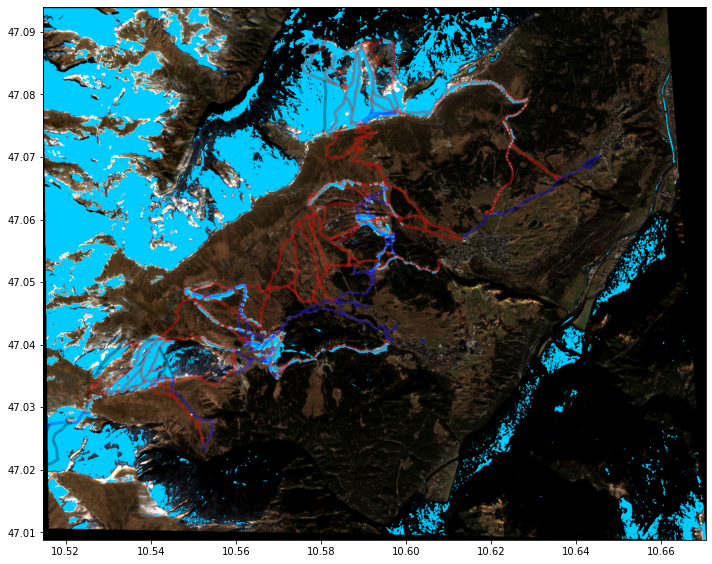

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

show(rgb,transform=sat_im.transform,ax=ax)
for col in ['blue','red','black']:
  ski_runs.loc[ski_runs.colorName == col].plot(ax=ax,color=col,alpha=0.3,linewidth=3)

ax.set_xlim(sat_im.bounds[0],sat_im.bounds[2])
ax.set_ylim(sat_im.bounds[1],sat_im.bounds[3])
plt.tight_layout()